## Analyze load testing

In [1]:
from pyaaas.models.dataset import Dataset
from pyaaas.aaas import AaaS
from pyaaas.models.attribute_type import AttributeType
import pandas as pd
from scripts import test_data
import timeit

In [2]:
def test_dataset(row_count):
    raw_data = test_data.test_dataset(row_count)
    df = pd.DataFrame(raw_data)
    df.set_index('id')
    dataset = Dataset.from_pandas(df)
    dataset.set_attribute("id", AttributeType.IDENTIFYING)
    return dataset

In [3]:
def run_test(dataset):
    risk_profile = con.risk_profile(dataset)

### 2. Run tests

In [4]:
con = AaaS("http://localhost:8080")
batches = (1000, 10000, 100000, 1000000)
result = {}
for batch in batches:
    elapsed_time = timeit.timeit(f"run_test(dataset)",
                                 setup=f"dataset = test_dataset({batch})",
                                 globals=globals(),
                                 number=1)
    result[str(batch)] = elapsed_time
    

In [5]:
result

{'1000': 0.021636977999150986,
 '10000': 0.04899240200029453,
 '100000': 0.6403088429997297,
 '1000000': 8.156710784000097}

### 3. Generate rapport

In [6]:
result_df = pd.DataFrame.from_dict(result, orient="index", columns=["time"])

In [7]:
result_df

,time
1000,0.021637
10000,0.048992
100000,0.640309
1000000,8.156711


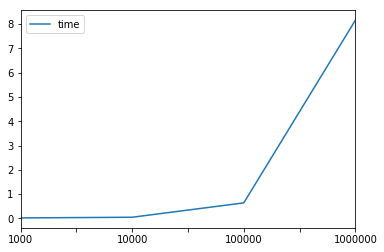

In [11]:
result_df.plot();